In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
from scipy.stats import skew

In [6]:
df=pd.read_csv('Automobile_data.csv')

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [8]:
df.shape

(205, 15)

In [9]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [11]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
df["normalized-losses"].replace("?",np.nan,inplace=True)

In [13]:
df["normalized-losses"]=df["normalized-losses"].astype("float") 

In [14]:
df["normalized-losses"].fillna(df["normalized-losses"].mean(),inplace=True)

In [15]:
df["horsepower"].replace("?",np.nan,inplace=True)

In [16]:
df["horsepower"]=df["horsepower"].astype("float") 

In [17]:
df["horsepower"].fillna(df["horsepower"].mean(),inplace=True)

In [18]:
df_cat=df.select_dtypes(object)

In [19]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [20]:
df_num=df.select_dtypes(["float64","int64"])

In [21]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [22]:
for col in df_cat :
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [23]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


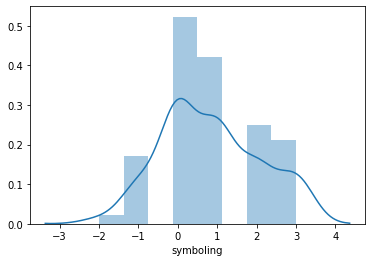

symboling : 0.20952469094997359


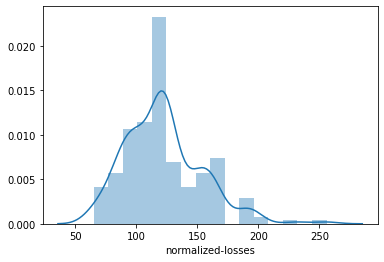

normalized-losses : 0.8485348696008058


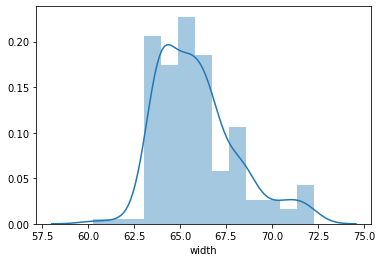

width : 0.8973753485201392


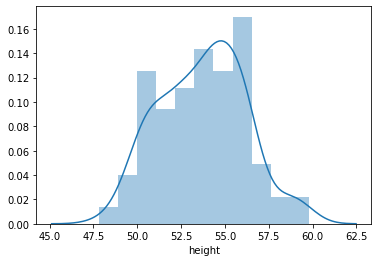

height : 0.06265991683394276


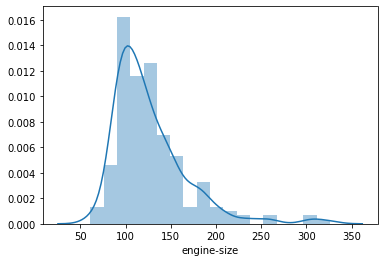

engine-size : 1.9333748457840114


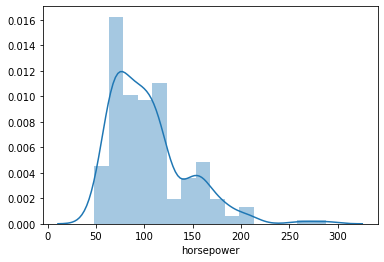

horsepower : 1.3875147343096037


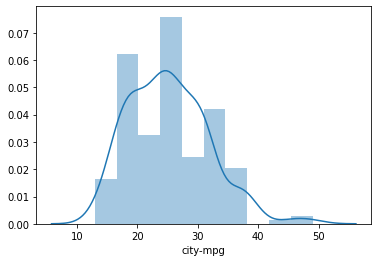

city-mpg : 0.6588377533622138


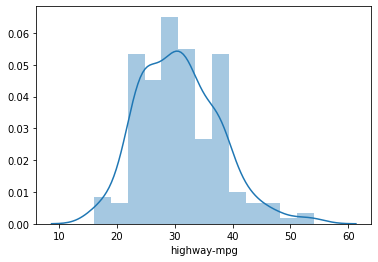

highway-mpg : 0.5360379305163596


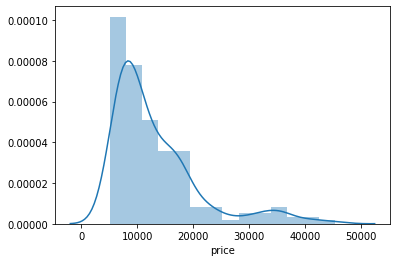

price : 1.791937476907277


In [24]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    print(col,':',skew(df_num[col]))

In [25]:
for col in df_num:
    if skew(df_num[col]) >= 0.1 or skew(df_num[col]) <= -0.1 :
        if col != "price" and col!="symboling":
            print(col,':',skew(df_num[col]))

normalized-losses : 0.8485348696008058
width : 0.8973753485201392
engine-size : 1.9333748457840114
horsepower : 1.3875147343096037
city-mpg : 0.6588377533622138
highway-mpg : 0.5360379305163596


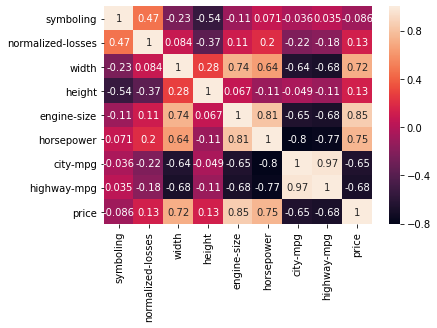

In [26]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [27]:
df_num["normalized-losses"]=np.sqrt(df_num["normalized-losses"])

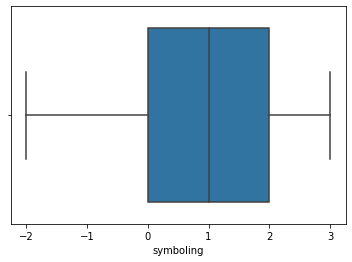

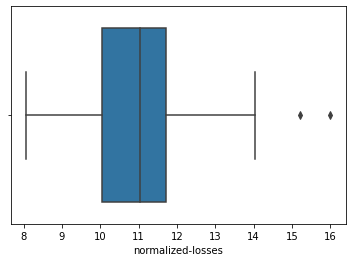

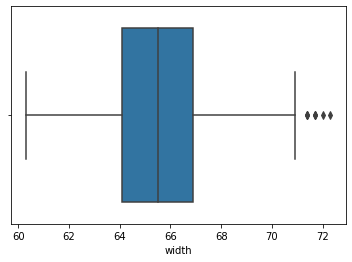

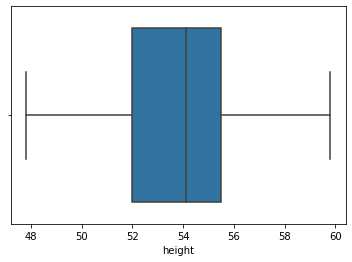

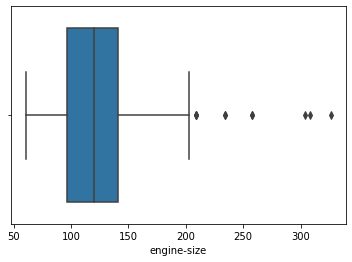

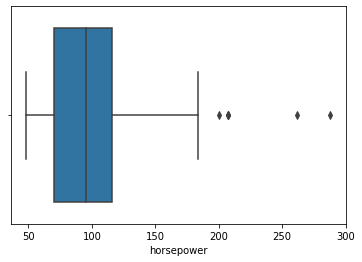

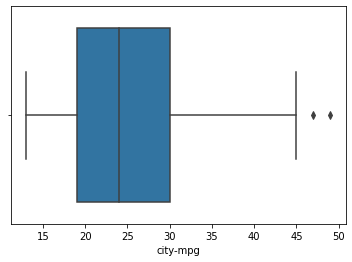

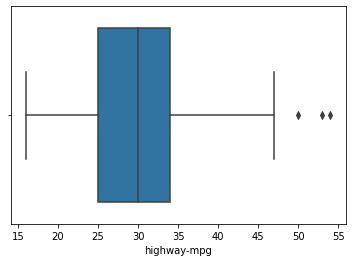

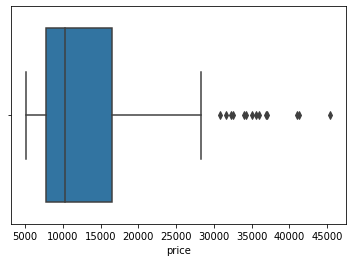

In [28]:
for col in df_num:
    plt.plot()
    sns.boxplot(df_num[col])
    plt.show()

In [29]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [30]:
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [31]:
s = df_new['normalized-losses']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [32]:
len(outliers1)

2

In [33]:
a=list(outliers1.keys())
df_new.drop(a,inplace=True)

In [34]:
s = df_new['width']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [35]:
len(outliers2)

9

In [36]:
b=list(outliers2.keys())
df_new.drop(b,inplace=True)

In [37]:
s = df_new['engine-size']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers3 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [38]:
len(outliers3)

6

In [39]:
c=list(outliers3.keys())
df_new.drop(c,inplace=True)

In [40]:
s = df_new['horsepower']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers4 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [41]:
len(outliers4)

4

In [42]:
d=list(outliers4.keys())
df_new.drop(d,inplace=True)

In [43]:
s = df_new['city-mpg']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers5 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [44]:
len(outliers5)

2

In [45]:
e=list(outliers5.keys())
df_new.drop(e,inplace=True)

In [46]:
s = df_new['highway-mpg']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers6 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [47]:
len(outliers6)

0

In [48]:
df_new.shape

(182, 15)

In [49]:
X=df_new.drop("price",axis=1)
Y=df_new["price"]

In [50]:
X.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,11.045361,64.1,48.8,130,111.0,21,27,0,1,0,2,0,0
1,3,11.045361,64.1,48.8,130,111.0,21,27,0,1,0,2,0,0
2,1,11.045361,65.5,52.4,152,154.0,19,26,0,1,2,2,0,5
3,2,12.806248,66.2,54.3,109,102.0,24,30,1,1,3,1,0,3
4,2,12.806248,66.4,54.3,136,115.0,18,22,1,1,3,0,0,3


In [51]:
Y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [53]:
ss=StandardScaler()

In [54]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [55]:
def create_model(model):
    model.fit(X_train_ss,Y_train)
    Y_pred=model.predict(X_test_ss)
    print(r2_score(Y_test,Y_pred))

In [56]:
from sklearn.metrics import r2_score

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr=LinearRegression()

In [59]:
create_model(lr)

0.7194509335671555


In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt=DecisionTreeRegressor()
create_model(dt)

0.6979215679712807


In [62]:
from sklearn.svm import LinearSVR

In [63]:
svm1=LinearSVR()
create_model(svm1)

-4.718606707935417


In [64]:
from sklearn.svm import SVR

In [65]:
svm2=SVR(kernel='poly')
svm3=SVR(kernel='rbf')

In [66]:
create_model(svm2)

-0.10052485475494954


In [67]:
create_model(svm3)

-0.10309930860963279


In [68]:
from sklearn.ensemble import AdaBoostRegressor

In [69]:
ada=AdaBoostRegressor()
create_model(ada)

0.7007826869440918


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
gbr=GradientBoostingRegressor()
create_model(gbr)

0.8086998909317467


In [72]:
from xgboost import XGBRegressor 

In [73]:
xg=XGBRegressor()
create_model(xg)

0.7592941220952683


In [74]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor

In [75]:
rfc=RandomForestRegressor()
create_model(rfc)

0.7859094695033773


In [76]:
bc1=BaggingRegressor(GradientBoostingRegressor(),random_state=1)
bc2=BaggingRegressor(GradientBoostingRegressor(),random_state=1,bootstrap=False)

In [77]:
create_model(bc1)

0.7919971364659193


In [78]:
create_model(bc2)

0.8090315295018241
